In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from math import sqrt
%matplotlib inline
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical_data = mouse_drug_data.merge(clinical_trial_data, how="left")
df = pd.DataFrame(mouse_clinical_data)

# Display the data table for preview
mouse_clinical_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = mouse_clinical_data.groupby(['Drug', 'Timepoint'], as_index=False).mean()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor_vol).drop(columns=['Metastatic Sites'])
# Preview DataFrame
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_e_tumor_vol = mouse_clinical_data.groupby(['Drug', 'Timepoint'], as_index=False)
#std_e_df = pd.DataFrame(std_e_tumor_vol, index=std_e_tumor_vol, columns=['Drug', 'Timepoint', 'Tumor Volume (mm3)'])
# Convert to DataFrame

# Preview DataFrame
#calculate all standard errors 
group = [groups[1] for groups in std_e_tumor_vol['Tumor Volume (mm3)']]
tumor_vol_list = []
for i in range(len(group)):
    std_e = stats.sem(group[i]['Tumor Volume (mm3)'])
    tumor_vol_list.append(std_e)
#convert into a dataframe
tumor_vol_fix = pd.DataFrame(tumor_vol_list)

std_e_fix = mean_tumor_df.drop(columns=['Tumor Volume (mm3)'])
std_e_merge = std_e_fix.merge(tumor_vol_fix, left_index=True, right_index=True)
std_e_df = std_e_merge.rename(columns={0:"Tumor Volume (mm3)"})
std_e_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
std_e_df['Tumor Volume (mm3)'][0:10]

0    0.000000
1    0.448593
2    0.702684
3    0.838617
4    0.909731
5    0.881642
6    0.934460
7    1.052241
8    1.223608
9    1.223977
Name: Tumor Volume (mm3), dtype: float64

In [5]:
# Minor Data Munging to Re-Format the Data Frames
drug_list = df['Drug'].drop_duplicates()
drugs = []
for i in drug_list:
    drugs.append(i)

data_mung = mouse_clinical_data.groupby(['Drug', 'Timepoint'], as_index=False).mean().drop(columns="Metastatic Sites")    
new_df = pd.DataFrame(index=df['Timepoint'].drop_duplicates(), columns=data_mung['Drug'].drop_duplicates())
# Preview that Reformatting worked
new_df

capo_mean = data_mung.set_index('Drug').loc['Capomulin', 'Tumor Volume (mm3)']
new_df['Capomulin'][0:10] = capo_mean.reset_index(drop=True)

ceft_mean = data_mung.set_index('Drug').loc['Ceftamin', 'Tumor Volume (mm3)']
new_df['Ceftamin'][0:10] = ceft_mean.reset_index(drop=True)

infu_mean = data_mung.set_index('Drug').loc['Infubinol', 'Tumor Volume (mm3)']
new_df['Infubinol'][0:10] = infu_mean.reset_index(drop=True)

keta_mean = data_mung.set_index('Drug').loc['Ketapril', 'Tumor Volume (mm3)']
new_df['Ketapril'][0:10] = keta_mean.reset_index(drop=True)

naft_mean = data_mung.set_index('Drug').loc['Naftisol', 'Tumor Volume (mm3)']
new_df['Naftisol'][0:10] = naft_mean.reset_index(drop=True)

plac_mean = data_mung.set_index('Drug').loc['Placebo', 'Tumor Volume (mm3)']
new_df['Placebo'][0:10] = plac_mean.reset_index(drop=True)

prop_mean = data_mung.set_index('Drug').loc['Propriva', 'Tumor Volume (mm3)']
new_df['Propriva'][0:10] = prop_mean.reset_index(drop=True)

rami_mean = data_mung.set_index('Drug').loc['Ramicane', 'Tumor Volume (mm3)']
new_df['Ramicane'][0:10] = rami_mean.reset_index(drop=True)

stel_mean = data_mung.set_index('Drug').loc['Stelasyn', 'Tumor Volume (mm3)']
new_df['Stelasyn'][0:10] = stel_mean.reset_index(drop=True)

zoni_mean = data_mung.set_index('Drug').loc['Zoniferol', 'Tumor Volume (mm3)']
new_df['Zoniferol'][0:10] = zoni_mean.reset_index(drop=True)

new_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
drug_loop = drug_list.reset_index(drop=True)
drug_loop

0     Stelasyn
1     Naftisol
2     Ketapril
3    Capomulin
4    Infubinol
5     Ceftamin
6     Propriva
7    Zoniferol
8     Ramicane
9      Placebo
Name: Drug, dtype: object

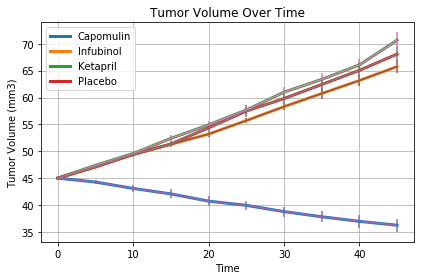

In [7]:
# Generate the Plot (with Error Bars)
drug_loop_reserve = ['Capomulin', 'Infubinol','Ketapril', 'Placebo']
for drug in drug_loop_reserve:
    next_plt, = plt.plot(df['Timepoint'].drop_duplicates(), 
                         new_df[drug],
                         label=drug,
                        linewidth=3)
    

plt.legend(loc="best", fontsize=10)
plt.title("Tumor Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()


#errorbars
for drug in drug_loop_reserve:
    plt.errorbar(df['Timepoint'].drop_duplicates(),
                 new_df[drug],
                 yerr=std_e_df.set_index('Drug').loc[drug]['Tumor Volume (mm3)'])
plt.tight_layout()
# Save the Figure
plt.savefig("TumorVol.png")


In [8]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = df.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame
mean_met_df = mean_met.mean().drop(columns=("Tumor Volume (mm3)"))
# Preview DataFrame
mean_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_std = mean_met.mean().drop(columns=("Tumor Volume (mm3)"))
met_std_list = []
e_dict = {}

groups = dict(list(mean_met))
for drug in drug_loop:
    for time in range(0, 46, 5):
        met_std_list.append(stats.sem(groups[drug, time]['Metastatic Sites']))
        e_dict_values = {drug: met_std_list}
        e_dict.update(e_dict_values)
    met_std_list = []
# Convert to DataFrame
e_df = pd.DataFrame(e_dict)
e_dict
for drug in drug_loop:
    met_std['Metastatic Sites'][drug] = e_dict[drug]

# Preview DataFrame
met_std.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
timepoint_df_index = met_std.reset_index().drop(columns=['Drug', 'Metastatic Sites']).drop_duplicates()
time_list_2 = 2*list(timepoint_df_index['Timepoint'])
time_list = timepoint_df_index['Timepoint']
meta_time_list = time_list[0:10]

sorted_drug_list = sorted(drug_loop)

met_std_error = met_std.rename(columns={"Metastatic Sites":"Metastatic Sites Error"}).loc[:,'Metastatic Sites Error'] 

meta_sites_df = mean_met_df.merge(met_std_error, left_index=True, right_index=True)
meta_graph_df_fix = pd.DataFrame(columns=meta_sites_df.index.levels[0],
             index=meta_time_list)
meta_time_list                             

0     0
1     5
2    10
3    15
4    20
5    25
6    30
7    35
8    40
9    45
Name: Timepoint, dtype: int64

In [12]:
meta_graph_df_fix = pd.DataFrame(columns=meta_sites_df.index.levels[0],
             index=list(timepoint_df_index['Timepoint']))
for drug in sorted_drug_list:
    meta_graph_df_fix[drug][0:10]=meta_sites_df['Metastatic Sites'][drug]
meta_graph_df_fix

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


In [13]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
meta_sites_df

Metastatic Sites  Metastatic Sites Error
Drug      Timepoint                                          
Capomulin 0                  0.000000                0.000000
          5                  0.160000                0.074833
          10                 0.320000                0.125433
          15                 0.375000                0.132048
          20                 0.652174                0.161621
          25                 0.818182                0.181818
          30                 1.090909                0.172944
          35                 1.181818                0.169496
          40                 1.380952                0.175610
          45                 1.476190                0.202591
Ceftamin  0                  0.000000                0.000000
          5                  0.380952                0.108588
          10                 0.600000                0.152177
          15                 0.789474                0.180625
          20                 1.111111                0.241034
          25                 1.500000                0.258831
          30                 1.937500                0.249479
          35                 2.071429                0.266526
          40                 2.357143                0.289128
          45                 2.692308                0.286101
Infubinol 0                  0.000000                0.000000
          5                  0.280000                0.091652
          10                 0.666667                0.159364
          15                 0.904762                0.194015
          20                 1.050000                0.234801
          25                 1.277778                0.265753
          30                 1.588235                0.227823
          35                 1.666667                0.224733
          40                 2.100000                0.314466
          45                 2.111111                0.309320
...                               ...                     ...
Ramicane  0                  0.000000                0.000000
          5                  0.120000                0.066332
          10                 0.250000                0.090289
          15                 0.333333                0.115261
          20                 0.347826                0.119430
          25                 0.652174                0.119430
          30                 0.782609                0.139968
          35                 0.952381                0.145997
          40                 1.100000                0.160591
          45                 1.250000                0.190221
Stelasyn  0                  0.000000                0.000000
          5                  0.240000                0.087178
          10                 0.478261                0.123672
          15                 0.782609                0.153439
          20                 0.952381                0.200905
          25                 1.157895                0.219824
          30                 1.388889                0.230641
          35                 1.562500                0.240983
          40                 1.583333                0.312815
          45                 1.727273                0.359062
Zoniferol 0                  0.000000                0.000000
          5                  0.166667                0.077709
          10                 0.500000                0.109109
          15                 0.809524                0.111677
          20                 1.294118                0.166378
          25                 1.687500                0.236621
          30                 1.933333                0.248168
          35                 2.285714                0.285714
          40                 2.785714                0.299791
          45                 3.071429                0.286400

[100 rows x 2 columns]

In [14]:
meta_graph_df_fix['Capomulin']

0     0.000000
5     0.160000
10    0.320000
15    0.375000
20    0.652174
25    0.818182
30    1.090909
35    1.181818
40    1.380952
45    1.476190
Name: Capomulin, dtype: float64

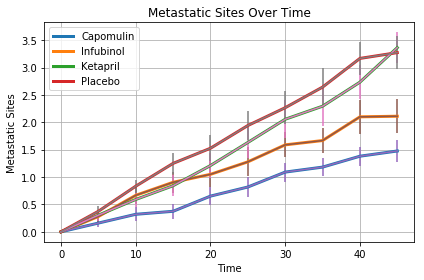

In [15]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
drug_loop_reserve = ['Capomulin', 'Infubinol','Ketapril', 'Placebo']
for drug in drug_loop_reserve:
    meta_next_plt, = plt.plot(meta_time_list[0:10], 
                         meta_graph_df_fix[drug],
                         label=drug,
                        linewidth=3)
    

plt.legend(loc="best", fontsize=10)
plt.title("Metastatic Sites Over Time")
plt.xlabel("Time")
plt.ylabel("Metastatic Sites")
plt.grid()


#errorbars
for drug in drug_loop_reserve:
    plt.errorbar(meta_time_list,
                 meta_graph_df_fix[drug],
                 yerr=met_std_error[drug])
plt.tight_layout()
# Save the Figure
plt.savefig("Meta_static_Resp.png")

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = df.groupby(['Drug', 'Timepoint']).count()
# Convert to DataFrame
survival_df_to_rename = pd.DataFrame(survival_count).reset_index().drop(columns=['Tumor Volume (mm3)', 'Metastatic Sites'])
#rename Column
survival_df = survival_df_to_rename.rename(columns={'Mouse ID':'Mouse Count'})
# Preview DataFrame

survival_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames
survival_mung = pd.DataFrame(survival_df, columns=survival_count.index.levels[0], index=survival_count.index.levels[1])

# Preview the Data Frame
for drug in sorted_drug_list:
    #survival_df[survival_df['Drug'] == drug]
    survival_mung[drug][0:10] = survival_df[survival_df['Drug'] == drug]['Mouse Count']
survival_mung

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


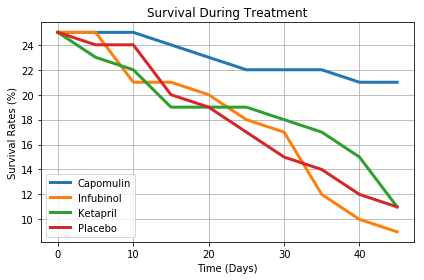

In [18]:
# Generate the Plot (Accounting for percentages)
drug_loop_reserve = ['Capomulin', 'Infubinol','Ketapril', 'Placebo']
for drug in drug_loop_reserve:
    meta_next_plt, = plt.plot(meta_time_list[0:10], 
                         survival_mung[drug],
                         label=drug,
                        linewidth=3)
    

plt.legend(loc="best", fontsize=10)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rates (%)")
plt.grid()


#errorbars
plt.tight_layout()
# Save the Figure
plt.savefig("Survival_Rates.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug

# Display the data to confirm
percent_change_dict = {}
for drug in sorted_drug_list:
    percent_change = (((new_df[drug][45] -new_df[drug][0])/ new_df[drug][0])*100)
    dict_term = {drug: percent_change}
    percent_change_dict.update(dict_term)
percent_change_s = pd.Series(percent_change_dict,name='Drug')

In [20]:
percent_change_tuple = tuple(percent_change_s[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']])
failing_drug = percent_change_tuple[0]
# Splice the data between passing and failing drugs
(passing_drugs_1, passing_drugs_2, passing_drugs_3) = percent_change_tuple[1:4]
failing_drug
failing_drug = percent_change_tuple[0]
(passing_drugs_1, passing_drugs_2, passing_drugs_3) = percent_change_tuple[1:4]

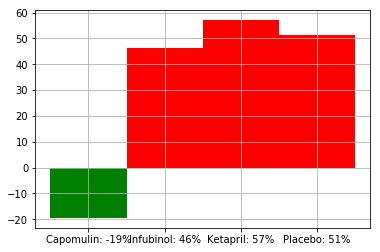

<Figure size 432x288 with 0 Axes>

In [21]:
# Store all Relevant Percent Changes into a Tuple

# Orient widths. Add labels, tick marks, etc. 
#fig = plt.figure(facecolor='white')
#fig = fig.add_subplot(1,1,1)
plt.grid(b=True)
plt.bar(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],height=[failing_drug, passing_drugs_1, passing_drugs_2, passing_drugs_3],
        color=['green','red','red','red'],
        tick_label =['Capomulin: -19%', 'Infubinol: 46%', 'Ketapril: 57%', 'Placebo: 51%'],
        width=1)



plt.show()


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure

plt.savefig("Percent_change.png")
# Show the Figure
#fig.show()